### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6dd05565ef', 'finish_reason': 'stop', 'logprobs': None}, id='run-4f0d271e-b2b4-4d43-b8f1-f724acd1dc71-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="Hello Krish! That's great to hear that you like playing cricket. Cricket is not only a popular sport but also a fantastic way to stay active and enjoy some competitive fun with friends. Whether you're playing a full game or just a casual match, it's always exciting. Do you have a favorite cricketer or a specific position you enjoy playing the most?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 39, 'total_tokens': 113, 'completion_time': 0.37, 'prompt_time': 0.004188354, 'queue_time': 0.054927625, 'total_time': 0.374188354}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-3ed210d9-2343-45d0-9e70-1efda8611a27-0', usage_metadata={'input_tokens': 39, 'output_tokens': 74, 'total_tokens': 113})

### We Will start With Creating Nodes

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

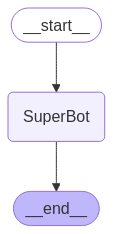

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='5ff70a7c-e695-42a2-bab3-eb2702e8840b'),
  AIMessage(content="Hello Krish! It's great to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player or team? Feel free to share more about what you like about the sport!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 39, 'total_tokens': 96, 'completion_time': 0.285, 'prompt_time': 0.004183263, 'queue_time': 0.049934495, 'total_time': 0.289183263}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-df27f670-94da-4a98-9139-48c0b358d265-0', usage_metadata={'input_tokens': 39, 'output_tokens': 57, 'total_tokens': 96})]}

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

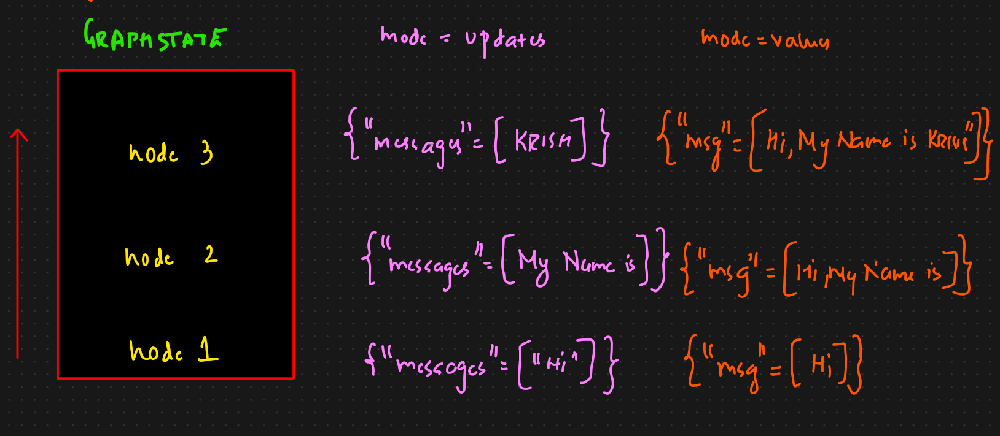

#### Streaming The Responses With Stream Method

In [11]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish! Nice to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 39, 'total_tokens': 79, 'completion_time': 0.2, 'prompt_time': 0.004209153, 'queue_time': 0.049875077, 'total_time': 0.204209153}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-29b1bde0-9600-4760-94ac-00f1796d1ce3-0', usage_metadata={'input_tokens': 39, 'output_tokens': 40, 'total_tokens': 79})]}}


In [12]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a18ff8c8-8db0-402e-8723-16b605c81b33'), AIMessage(content="Hello Krish! Nice to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 39, 'total_tokens': 79, 'completion_time': 0.2, 'prompt_time': 0.004209153, 'queue_time': 0.049875077, 'total_time': 0.204209153}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-29b1bde0-9600-4760-94ac-00f1796d1ce3-0', usage_metadata={'input_tokens': 39, 'output_tokens': 40, 'total_tokens': 79}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='e54ab34f-273f-407f-bb6e-e46c851f1804')]}
{'messages': [HumanMessage(co

In [13]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='It sounds like you enjoy a variety of sports! Both cricket and football can be really exciting. Do you have any favorite teams or players in football? And do you prefer playing or watching these sports? It’s always fun to talk about sports, so feel free to share more!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 145, 'total_tokens': 202, 'completion_time': 0.285, 'prompt_time': 0.010273671, 'queue_time': 0.051538397, 'total_time': 0.295273671}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-90f9d6fa-77a3-4d71-b079-65129e951636-0', usage_metadata={'input_tokens': 145, 'output_tokens': 57, 'total_tokens': 202})]}}


In [14]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a18ff8c8-8db0-402e-8723-16b605c81b33'), AIMessage(content="Hello Krish! Nice to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 39, 'total_tokens': 79, 'completion_time': 0.2, 'prompt_time': 0.004209153, 'queue_time': 0.049875077, 'total_time': 0.204209153}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_c527211fd1', 'finish_reason': 'stop', 'logprobs': None}, id='run-29b1bde0-9600-4760-94ac-00f1796d1ce3-0', usage_metadata={'input_tokens': 39, 'output_tokens': 40, 'total_tokens': 79}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='e54ab34f-273f-407f-bb6e-e46c851f1804'), AIMessage(content="That's grea

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [15]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '6d661a1d-1828-43de-a883-de3da8f22366', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': '__start__', 'tags': ['graph:step:12', 'langsmith:hidden'], 'run_id': '44fcc8c8-a766-44bf-8e37-c74c1093eca1', 'metadata': {'thread_id': '3', 'langgraph_step': 12, 'langgraph_node': '__start__', 'langgraph_triggers': ['__start__'], 'langgraph_path': ('__pregel_pull', '__start__'), 'langgraph_checkpoint_ns': '__start__:340d6f86-a0a7-b21f-ea21-28e206ee963b'}, 'parent_ids': ['6d661a1d-1828-43de-a883-de3da8f22366']}
{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': '_write', 'tags': ['seq:step:1', 'langsmith:hidden', 'langsmith:hidden'], 'run_id': 'd80ee16c-aec